# **Retail Data Analysis**

## Q1. Preparing Dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
Customer = pd.read_csv("Customer.csv")
Customer

,customer_Id,DOB,Gender,city_code
0,268408,2-1-70,M,4.0
1,269696,7-1-70,F,8.0
2,268159,8-1-70,F,8.0
3,270181,10-1-70,F,2.0
4,268073,11-1-70,M,1.0
...,...,...,...,...
5642,274474,19-12-92,M,2.0
5643,267666,24-12-92,M,6.0
5644,270476,25-12-92,F,3.0
5645,269626,27-12-92,F,5.0


In [ ]:
Product_hierarchy = pd.read_csv("prod_cat_info.csv")
Product_hierarchy

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [ ]:
Transaction = pd.read_csv("Transactions.csv")
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [ ]:
# 1. Merging
Customer_Trans = pd.merge(left = Customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner')

In [ ]:
Customer_Trans

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,2-1-70,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,2-1-70,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,2-1-70,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,2-1-70,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-92,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-92,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-92,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [ ]:
Customer_Final = pd.merge(left = Customer_Trans,
                          right = Product_hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )


In [ ]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women


## Q2. Summary Report


### Column names with their data-types


In [ ]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

### Top 10 Observations

In [ ]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268159,8-1-70,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,7,Fiction
7,268159,8-1-70,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,12,Academic
8,268159,8-1-70,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,10,Non-Fiction
9,268159,8-1-70,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Children


### 10 Bottom Observations

In [ ]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,9-12-92,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,Clothing,3,Kids
99284,268097,15-12-92,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Mens
99285,268097,15-12-92,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,1,Women
99286,268097,15-12-92,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,3,Kids
99287,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Mens
99288,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,1,Women
99289,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,3,Kids
99290,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,4,Mens
99291,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,1,Women
99292,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Kids


### Eight Number Summary

In [ ]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99293.000000,99257.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.010635,5.467221,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.333624,2.859343,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


In [ ]:
import numpy as np
Data_min = Customer_Final['total_amt'].min()
Data_max = Customer_Final['total_amt'].max()
Data_q1  = np.percentile(Customer_Final.total_amt,25)
median  = np.percentile(Customer_Final.total_amt,50)
Data_q3  = np.percentile(Customer_Final.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)


Min =  -8270.925
Max =  8287.5
Median =  1761.37
Q1 =  762.45
Q3 =  3585.725


## Frequency Table :

### Store type

In [ ]:
Customer_Final.Store_type.value_counts()

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

In [ ]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Female','Male']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Female,9767,9687,9159,19589
Male,10047,10278,10142,20584


### Prod_cat

In [ ]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,1988,17694,4317,11640,4587,7976
Female,2008,18696,4554,12850,4407,8536


### Prod_subcat

In [ ]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
Female,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


## Q3. Histograms for all continuous variables and frequency bars for categorical variables

### Histogram for continous variables -


### 1. Tax

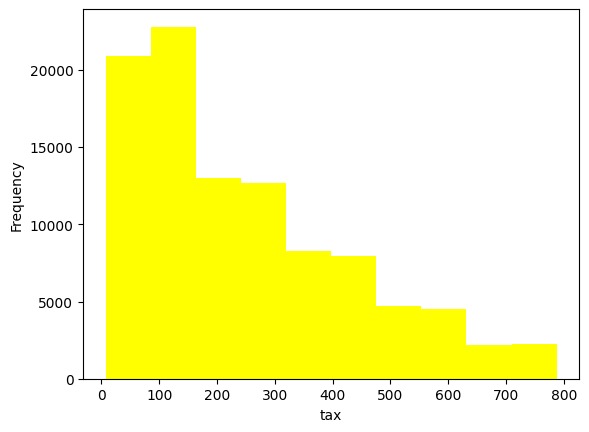

In [ ]:
import matplotlib.pyplot as plt
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['yellow'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

### 2. Total amount

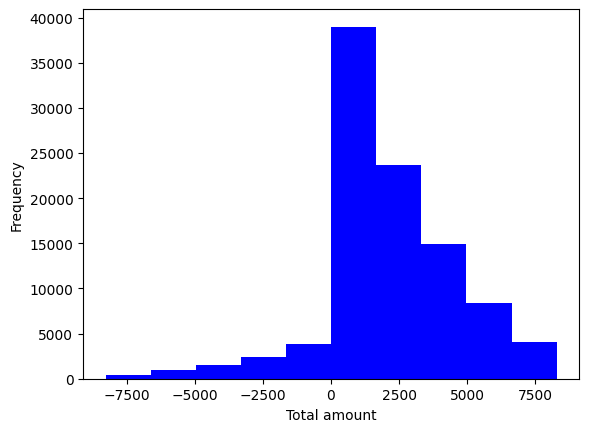

In [ ]:
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

### Frequency Bar for Categorical variables -



### 1. Gender

In [ ]:
Customer_Final['Gender'].value_counts()

M    51051
F    48202
Name: Gender, dtype: int64

<Axes: >

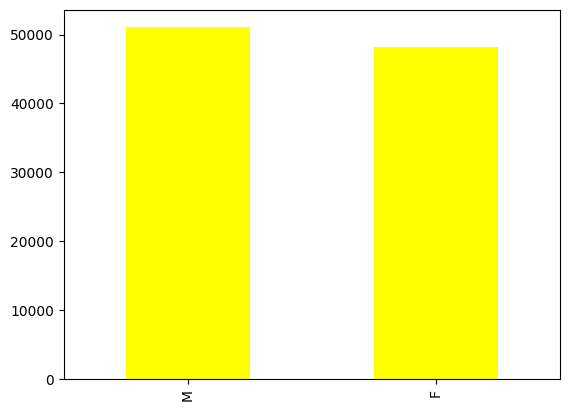

In [ ]:
Customer_Final['Gender'].value_counts().plot(kind = 'bar', color=['yellow'])

### 2. Store type

<Axes: ylabel='Store_type'>

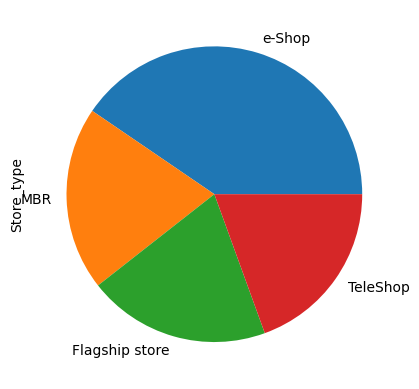

In [ ]:
Customer_Final['Store_type'].value_counts().plot(kind = 'pie')

### 3. Product category

<Axes: >

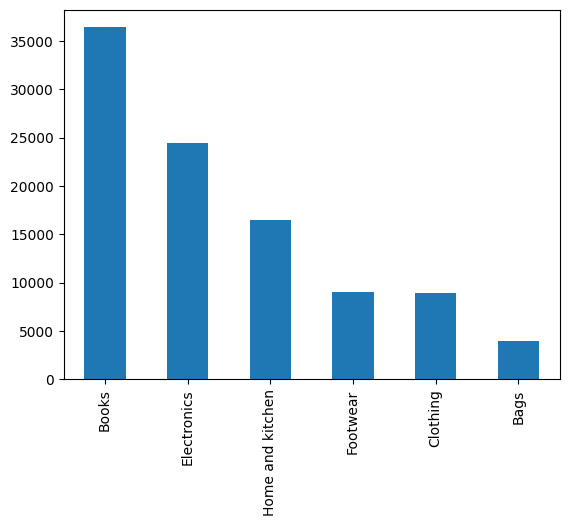

In [ ]:
Customer_Final['prod_cat'].value_counts().plot(kind = 'bar')

### 4. Product sub category

<Axes: >

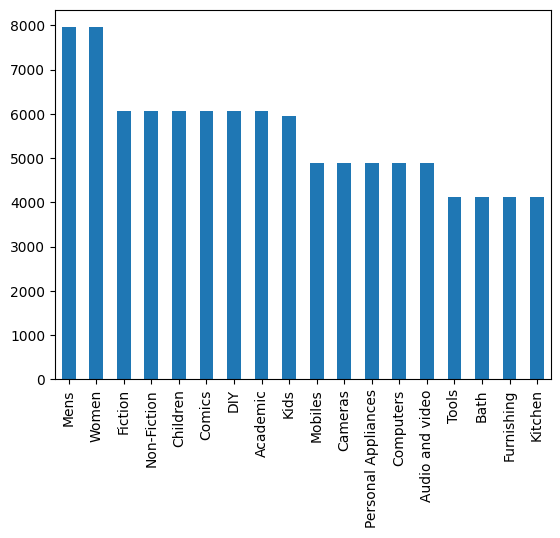

In [ ]:
Customer_Final['prod_subcat'].value_counts().plot(kind = 'bar')

## Q4

### A. Count number of negative total amount

In [ ]:
df = Customer_Final['total_amt']
df[df<0]

12      -3102.840
13      -3102.840
14      -3102.840
15      -3102.840
16      -3102.840
           ...   
99261   -7889.700
99262   -7889.700
99272    -522.665
99273    -522.665
99274    -522.665
Name: total_amt, Length: 9294, dtype: float64

In [ ]:
df = Customer_Final['total_amt']
count2 = Customer_Final.loc[(df<0),['total_amt']].count()
count2

total_amt    9294
dtype: int64

## Q5. Analyze which product categories are more popular among females vs male customers.

In [ ]:
M = Customer_Final[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].count()
popular_M = group_prod.nlargest(1)
print('The most popular product category in Male customers is : ',popular_M)

The most popular product category in Male customers is :  prod_cat
Books    18696
Name: total_amt, dtype: int64


In [ ]:
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].count()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)

'The most popular product category in Female customers is : '

prod_cat
Books    17694
Name: total_amt, dtype: int64

In [ ]:
# Popular among Male
M = Customer_Final[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

In [ ]:
# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)


'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

#### Among Male vs Female the most popular product category is Books.

## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [ ]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)
t

3.0    595
Name: city_code, dtype: int64

In [ ]:
tot_customer = Customer['customer_Id'].count()
tot_customer

5647

In [ ]:
print("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

City code which has Maximum customers is :  3.0    595
Name: city_code, dtype: int64
Percentage of customers from the city code 3 is 10.54% : 


## Q7. What was the total amount earned from the "Electronics" and "Clothing"?

In [ ]:
df = pd.DataFrame(Customer_Final)

tf = df[df.prod_cat.isin(['Electronics','Clothing'])]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 72365730.645


## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [ ]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [ ]:
tf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 28515547.125


## Q10. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [ ]:
curr_year = pd.to_datetime('today').year
curr_year

2023

In [ ]:
dob_year = pd.DatetimeIndex(df['DOB']).year
dob_year

Int64Index([2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070,
            ...
            1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992],
           dtype='int64', name='DOB', length=99293)

In [ ]:
minus_hun_years = dob_year-100
v = curr_year - minus_hun_years
y = curr_year - dob_year

In [ ]:
v

Int64Index([ 53,  53,  53,  53,  53,  53,  53,  53,  53,  53,
            ...
            131, 131, 131, 131, 131, 131, 131, 131, 131, 131],
           dtype='int64', name='DOB', length=99293)

In [ ]:
y

Int64Index([-47, -47, -47, -47, -47, -47, -47, -47, -47, -47,
            ...
             31,  31,  31,  31,  31,  31,  31,  31,  31,  31],
           dtype='int64', name='DOB', length=99293)

In [ ]:
df['age'] = (np.where(dob_year > curr_year,v,y))
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,53
1,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic,53
2,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction,53
3,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children,53
4,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women,31
99289,271772,17-12-92,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids,31
99290,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens,31
99291,269626,27-12-92,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women,31


In [ ]:
total = df.loc[((df.age >25) & (df.age <35)) & (df.prod_cat.isin(['Books','Electronics']))]['total_amt'].sum()
print('Total amount spent',total)

Total amount spent 21751521.675


### b.  What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [ ]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  5591225.965


In [ ]:
# Customer_Final['tran_year']=lambda 'tran_date':%Y
# Customer_Final['tran_year']=lambda x : datetime.strptime(tran_date,%y')

Customer_Final['tran_year']=Customer_Final['tran_date'].apply(lambda x :x.year)
print(Customer_Final)

       customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
0           268408    2-1-70      M        4.0     87243835584   268408   
1           268408    2-1-70      M        4.0     87243835584   268408   
2           268408    2-1-70      M        4.0     87243835584   268408   
3           268408    2-1-70      M        4.0     87243835584   268408   
4           268408    2-1-70      M        4.0     87243835584   268408   
...            ...       ...    ...        ...             ...      ...   
99288       271772  17-12-92      M        2.0     10440850091   271772   
99289       271772  17-12-92      M        2.0     10440850091   271772   
99290       269626  27-12-92      F        5.0     94134051896   269626   
99291       269626  27-12-92      F        5.0     94134051896   269626   
99292       269626  27-12-92      F        5.0     94134051896   269626   

       tran_date  prod_subcat_code  prod_cat_code  Qty  ...  total_amt  \
0     2014-01-13         

In [ ]:
Customer_Final['decimal_of_tot_amt']=Customer_Final['total_amt'].apply(lambda x : x- int(x))
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age,tran_year,decimal_of_tot_amt
0,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,53,2014,0.175
1,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic,53,2014,0.175
2,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction,53,2014,0.175
3,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children,53,2014,0.175
4,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics,53,2014,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-92,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women,31,2013,0.980
99289,271772,17-12-92,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids,31,2013,0.980
99290,269626,27-12-92,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens,31,2011,0.570
99291,269626,27-12-92,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women,31,2011,0.570


In [ ]:
Customer_Final['total_amount_of_decimal_part_of_tax']=Customer_Final['Tax'].apply(lambda x : x- int(x))
Customer_Final['total_amount_of_decimal_part_of_tax'].sum()

48796.87999999999

In [ ]:
Customer_Final['margin']=Customer_Final['total_amt'].apply(lambda x : x*0.20)
Customer_Final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,...,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age,tran_year,decimal_of_tot_amt,total_amount_of_decimal_part_of_tax,margin
0,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,...,1033.175,TeleShop,Books,7,Fiction,53,2014,0.175,0.175,206.635
1,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,...,1033.175,TeleShop,Books,12,Academic,53,2014,0.175,0.175,206.635
2,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,...,1033.175,TeleShop,Books,10,Non-Fiction,53,2014,0.175,0.175,206.635
3,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,...,1033.175,TeleShop,Books,11,Children,53,2014,0.175,0.175,206.635
4,268408,2-1-70,M,4.0,87243835584,268408,2014-01-13,7,5,5,...,1033.175,TeleShop,Books,3,Comics,53,2014,0.175,0.175,206.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-92,M,2.0,10440850091,271772,2013-04-26,4,1,4,...,3619.980,Flagship store,Clothing,1,Women,31,2013,0.980,0.980,723.996
99289,271772,17-12-92,M,2.0,10440850091,271772,2013-04-26,4,1,4,...,3619.980,Flagship store,Clothing,3,Kids,31,2013,0.980,0.980,723.996
99290,269626,27-12-92,F,5.0,94134051896,269626,2011-07-07,3,1,3,...,3573.570,MBR,Clothing,4,Mens,31,2011,0.570,0.570,714.714
99291,269626,27-12-92,F,5.0,94134051896,269626,2011-07-07,3,1,3,...,3573.570,MBR,Clothing,1,Women,31,2011,0.570,0.570,714.714
